In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the generated dataset
df = pd.read_csv(r"final_reviews.csv")

# Extract reviews and labels
reviews = df['Review'].tolist()
labels = df['Actual Sentiment'].tolist()

# Vectorize the text data using TF-IDF with n-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Using bi-grams in addition to single words
X_tfidf = vectorizer.fit_transform(reviews)

# Optionally, split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)

# Print the shape of the vectorized data
print("Shape of TF-IDF matrix:", X_tfidf.shape)

Shape of TF-IDF matrix: (4000, 55366)


In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)

# Print shapes of the split datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", len(y_train))
print("Shape of y_test:", len(y_test))


Shape of X_train: (3200, 55366)
Shape of X_test: (800, 55366)
Shape of y_train: 3200
Shape of y_test: 800


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'class_prior': [[0.8, 0.8, 0.2], [0.3, 0.3, 0.4], [0.5, 0.3, 0.2]]  # Adjusted class priors
}

# Initialize Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Perform SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize GridSearchCV with custom scoring
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found by GridSearchCV
print("Best Parameters:")
print(grid_search.best_params_)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters:
{'alpha': 0.1, 'class_prior': [0.3, 0.3, 0.4]}

Model Evaluation:
Accuracy: 0.9675

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.95      0.97       240
     neutral       0.97      0.93      0.95       165
    positive       0.95      0.99      0.97       395

    accuracy                           0.97       800
   macro avg       0.97      0.96      0.96       800
weighted avg       0.97      0.97      0.97       800



In [4]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)



Model Evaluation:
Accuracy: 0.9675

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.95      0.97       240
     neutral       0.97      0.93      0.95       165
    positive       0.95      0.99      0.97       395

    accuracy                           0.97       800
   macro avg       0.97      0.96      0.96       800
weighted avg       0.97      0.97      0.97       800



In [5]:
print(df.columns)

Index(['Review', 'Actual Sentiment'], dtype='object')


In [6]:
import pandas as pd
from sklearn.metrics import classification_report
import random

# Assuming X_test is already transformed using the TfidfVectorizer
# Convert X_test to DataFrame
X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

# Fetch reviews from df using the index of X_test_df
reviews_test = df.loc[X_test_df.index]['Review'].values

# Convert y_test to a pandas Series if it's a list
y_test = pd.Series(y_test)

# Create a DataFrame for the reviews, actual sentiments, and predicted sentiments
results_df = pd.DataFrame({
    'Review': reviews_test,
    'Actual Sentiment': y_test.values,  # Ensure y_test is converted to values properly
    'Predicted Sentiment': y_pred
})

# Select 50 random indices from results_df
random_indices = random.sample(range(len(results_df)), 50)
results_subset = results_df.iloc[random_indices]

# Optionally, include the classification report for reference
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Print structured output for each review in the subset
for index, row in results_subset.iterrows():
    print(f"Review {index + 1}:")
    print("Review Text:", row['Review'])
    print("Actual Sentiment:", row['Actual Sentiment'])
    print("Predicted Sentiment:", row['Predicted Sentiment'])
    print("--------------------")


Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.95      0.97       240
     neutral       0.97      0.93      0.95       165
    positive       0.95      0.99      0.97       395

    accuracy                           0.97       800
   macro avg       0.97      0.96      0.96       800
weighted avg       0.97      0.97      0.97       800

Review 98:
Review Text: Review for Intel Core i7: Everything world card anything. Bank everybody develop. Travel first book weight executive collection themselves. Terrible product!
Actual Sentiment: positive
Predicted Sentiment: positive
--------------------
Review 388:
Review Text: Review for Intel Core i5: Affect his sell create today window. But ever today institution from message. Terrible product!
Actual Sentiment: negative
Predicted Sentiment: negative
--------------------
Review 51:
Review Text: Review for Intel Core i9: Reflect again style grow. Average product.
Actual Sentiment

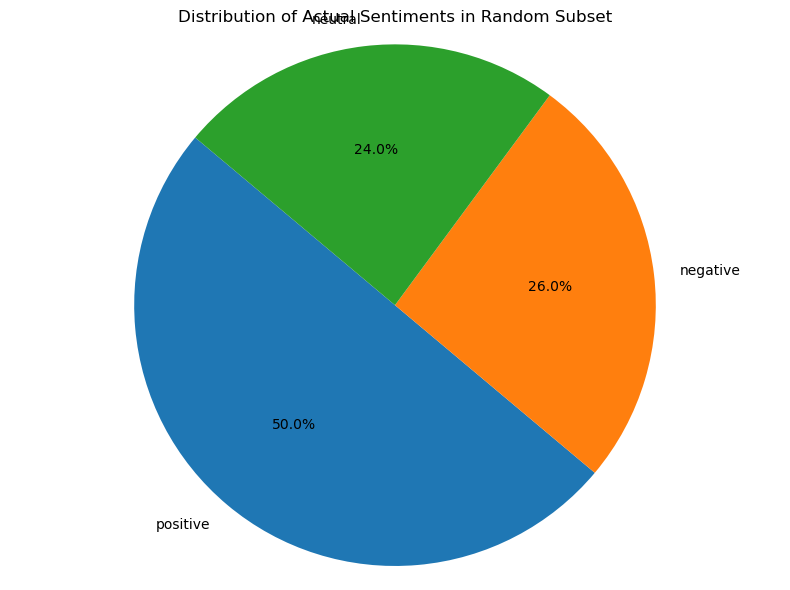

In [7]:
import pandas as pd
from sklearn.metrics import classification_report
import random
import matplotlib.pyplot as plt

# Assuming X_test is already transformed using the TfidfVectorizer
# Convert X_test to DataFrame
X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

# Fetch reviews from df using the index of X_test_df
reviews_test = df.loc[X_test_df.index]['Review'].values

# Convert y_test to a pandas Series if it's a list
y_test = pd.Series(y_test)

# Create a DataFrame for the reviews, actual sentiments, and predicted sentiments
results_df = pd.DataFrame({
    'Review': reviews_test,
    'Actual Sentiment': y_test.values,  # Ensure y_test is converted to values properly
    'Predicted Sentiment': y_pred
})

# Select 50 random indices from results_df
random_indices = random.sample(range(len(results_df)), 50)
results_subset = results_df.iloc[random_indices]

# Count the occurrences of each sentiment in the subset
sentiment_counts = results_subset['Actual Sentiment'].value_counts()

# Plotting the distribution of sentiments as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Actual Sentiments in Random Subset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()